# Dropout in Neural Networks

Dropout is a regularization technique used in neural networks to prevent overfitting. It works by randomly "dropping out" (setting to zero) a fraction of the neurons during training, ensuring the network doesn't rely too heavily on specific neurons. This forces the model to learn more robust features.

## How Dropout Works
1. During training, a randomly selected subset of neurons is ignored (set to zero) in each forward and backward pass.
2. This random dropping of neurons creates multiple "thinned" versions of the network, effectively training an ensemble of subnetworks.
3. During testing (or inference), no neurons are dropped. Instead, their weights are scaled down by the dropout rate to maintain consistency with the training phase.

## Key Parameters in Dropout
Dropout is implemented as a layer in frameworks like Keras and PyTorch. Below are its main parameters:

### **1. `rate`**
- The fraction of neurons to drop.
- Value: A float between `0` and `1`.
  - Example: `rate=0.2` means 20% of neurons are dropped.
- Common values are `0.2` to `0.5`.

### **2. `seed` (optional)**
- A random seed for reproducibility.
- Default: None.

## Benefits of Dropout
1. **Reduces Overfitting**:
   - Prevents the network from becoming overly dependent on specific neurons.
   - Encourages the model to generalize better to unseen data.
2. **Acts as Regularization**:
   - Similar to \(L_1\) or \(L_2\) regularization but often more effective for deep networks.

## Dropout in Keras
In Keras, dropout is added as a layer in the model.

### Example Code:
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Input layer
    Dropout(0.2),  # Dropout with 20% rate
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Dropout with 30% rate
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


---

# How Dropout is Similar to Random Forest

Dropout in neural networks and Random Forests are both techniques that leverage randomness to improve model generalization and reduce overfitting. While they are used in different contexts (neural networks vs. decision trees), there are conceptual similarities in their mechanisms:

## 1. **Ensemble-Like Behavior**
- **Random Forest**:
  - Combines predictions from multiple decision trees, each trained on a random subset of features and/or data samples.
  - This randomness reduces correlation between individual trees, leading to a more robust final prediction.
  
- **Dropout**:
  - During training, Dropout randomly deactivates a subset of neurons in each layer. This creates many "thinned" versions of the network.
  - Effectively, an ensemble of smaller subnetworks is trained simultaneously.
  - At inference, all neurons are used, similar to aggregating predictions from all trees in a Random Forest.

## 2. **Prevent Overfitting**
Both methods aim to prevent overfitting by introducing randomness:
- **Random Forest**:
  - Reduces overfitting by ensuring no single tree dominates the prediction.
  - Each tree is trained on slightly different data or features, leading to diverse decision boundaries.
  
- **Dropout**:
  - Reduces overfitting by ensuring no single neuron becomes overly important.
  - Forces the network to distribute learning across neurons.

## 3. **Robustness Through Diversity**
- **Random Forest**:
  - Diversity is achieved by training individual trees on different random subsets of features and data samples.
  
- **Dropout**:
  - Diversity is achieved by training the network with different random subsets of neurons in each forward pass.

## Key Differences
While there are similarities, the two methods are fundamentally different:
| Feature                | Random Forest                            | Dropout                                |
|------------------------|------------------------------------------|----------------------------------------|
| **Type of Model**      | Ensemble of decision trees               | Regularization technique in neural nets |
| **Focus**              | Randomizing input features and data      | Randomizing neurons during training    |
| **Inference**          | Combines predictions from all trees      | Uses all neurons with scaled weights   |
| **Implementation**     | Part of model architecture               | Applied to existing neural network layers |

## Analogy
Think of Dropout as creating a "forest" of neural networks, where each training iteration randomly prunes some "branches" (neurons). Similarly, Random Forest creates a collection of decision trees with randomly selected "features" (splits). Both techniques promote diversity and prevent over-reliance on specific components, leading to more generalized models.

By introducing randomness and ensuring no single element dominates, both Dropout and Random Forest improve robustness and generalization.


# Why Dropout is Used During Training, Not Testing

Dropout is a regularization technique that is **only applied during training** and not during testing (or inference). This is because the purpose of Dropout is to prevent overfitting during training by introducing randomness. Here's a detailed explanation:

---

## 1. **Role of Dropout During Training**
- During training, Dropout randomly deactivates (sets to zero) a fraction of neurons in each layer for every forward pass.
- This random "dropping out" forces the network to:
  - Learn more robust features by not relying on specific neurons.
  - Distribute learning across all neurons, which prevents over-reliance on specific pathways.
- As a result, the network behaves like an ensemble of multiple subnetworks, improving generalization.

---

## 2. **Why Not Use Dropout During Testing**
- **Deterministic Behavior**: During testing, the goal is to get stable and accurate predictions. Dropout introduces randomness, which can lead to inconsistent outputs. For inference, we need the full network's capacity to ensure reliable predictions.
- **Averaging Effect**: During testing, all neurons are active, but their weights are scaled by the dropout rate. This scaling ensures the predictions mimic the averaged behavior of the "thinned" networks from training. Without this adjustment, the outputs would be disproportionately large.

---

## 3. **Scaling During Testing**
To make predictions consistent with the training phase:
- During training, each neuron contributes only part of the time (e.g., 80% active if `dropout=0.2`).
- During testing, all neurons are active, but their weights are multiplied by \( (1 - \text{dropout\_rate}) \).
  - Example: If the dropout rate is 0.2, the active weights are scaled by 0.8.
- This ensures the network's output during testing is comparable to its output during training with Dropout applied.

---

## 4. **Key Differences Between Training and Testing**
| Phase      | Behavior of Dropout                | Purpose                                |
|------------|------------------------------------|----------------------------------------|
| **Training** | Randomly deactivates neurons       | Prevents overfitting by encouraging robustness. |
| **Testing**  | All neurons active, weights scaled | Provides stable and reliable predictions.        |

---

## 5. **Why Dropout During Testing Would Be Problematic**
- **Inconsistent Predictions**: Randomly deactivating neurons during testing would cause the network to give different outputs for the same input, making it unreliable.
- **Reduced Capacity**: The network would function with reduced capacity, leading to suboptimal performance.
- **Inference Stability**: For real-world applications like medical diagnostics or autonomous driving, consistent and deterministic predictions are critical.

---

## Summary
Dropout is applied during training to enhance generalization by introducing randomness and forcing robustness. During testing, all neurons are used, but weights are scaled to reflect the training phase's effective neuron utilization, ensuring stable and accurate predictions.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

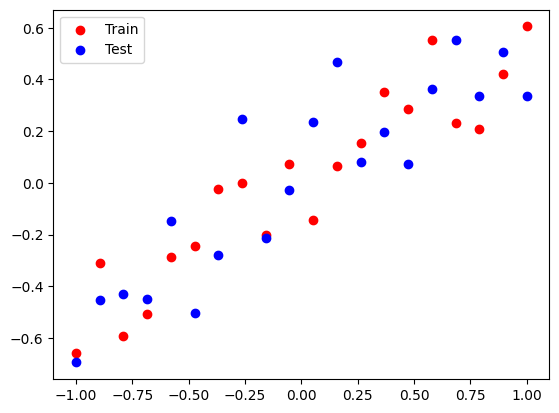

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [7]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

c:\Users\vikas\OneDrive\Desktop\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.003633177373558283, Test: 0.04439132288098335


In [9]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


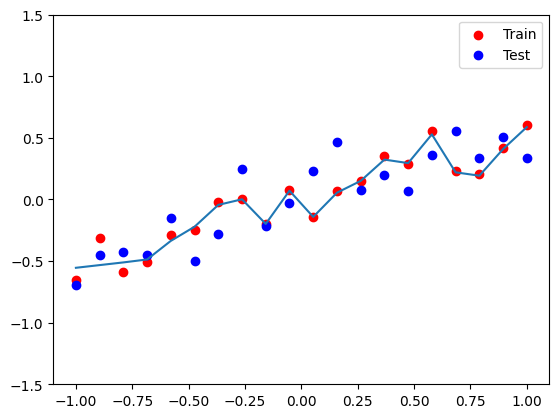

In [10]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout Model

In [11]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [12]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.012923683039844036, Test: 0.037627026438713074


In [13]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


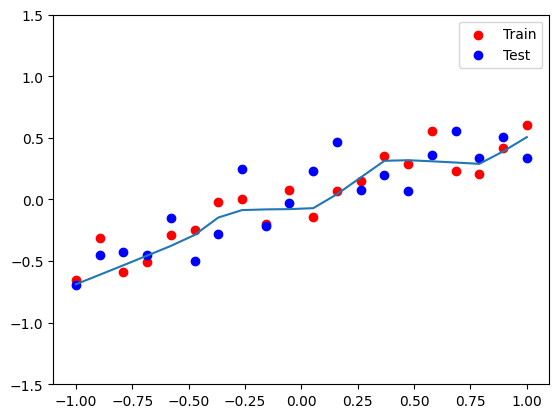

In [14]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [15]:
print("The End")

The End
